# Import các thư viện

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,f1_score
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Đọc dữ liệu (sents, sentiments, topics)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
senti_train = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/train/sentiments.txt',names=('s'))
sents_train = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/train/sents.txt',names=('s'))
topics_train = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/train/topics.txt',names=('t'))

senti_dev = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/dev/sentiments.txt',names=('s'))
sents_dev = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/dev/sents.txt',names=('s'))
topics_dev = pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/dev/topics.txt',names=('t'))

sents_test =pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/test/sents.txt',names=('s'))
senti_test =pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/test/sentiments.txt',names=('s'))
topics_test=pd.read_table('/content/drive/My Drive/HMTK_DoAnCuoiKi/Data/test/topics.txt',names=('t'))

# Thống kê dữ liệu Topics Label

In [4]:
X_test=sents_test[['s']]
y_test=topics_test[['t']]
X_train=sents_train[['s']]
y_train=topics_train[['t']]
X_dev=sents_dev[['s']]
y_dev=topics_dev[['t']]

Text(0, 0.5, 'so luong')

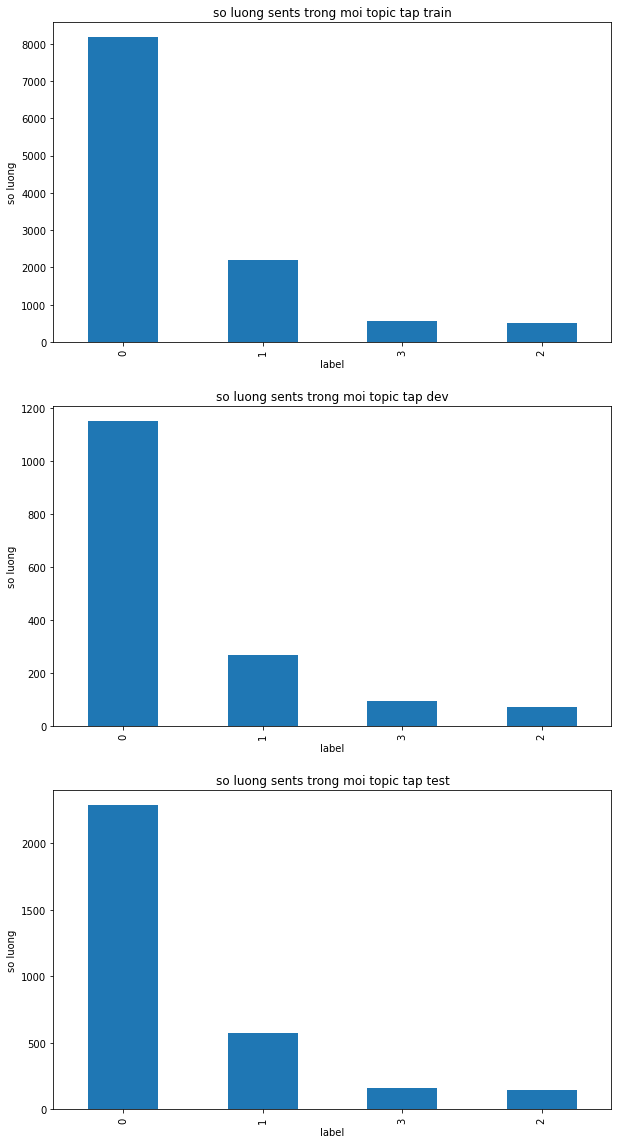

In [5]:
plt.figure(figsize=(10,20))
plt.subplot(311)
y_train['t'].value_counts().plot(kind='bar')
plt.title('so luong sents trong moi topic tap train')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(312)
y_dev['t'].value_counts().plot(kind='bar')
plt.title('so luong sents trong moi topic tap dev')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(313)
y_test['t'].value_counts().plot(kind='bar')
plt.title('so luong sents trong moi topic tap test')
plt.xlabel('label')
plt.ylabel('so luong')

# Train model bằng Naive Bayes cho label Topics




In [17]:
my_tags =['0','1','2','3']
nb = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
nb.fit(sents_train['s'],topics_train['t'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [18]:
from sklearn.metrics import classification_report
y_pred = nb.predict(sents_test['s'])

print('accuracy %s' % accuracy_score(y_pred, topics_test['t']))
print(classification_report(topics_test['t'], y_pred,target_names=my_tags))

accuracy 0.8114339861023373
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2290
           1       0.67      0.46      0.54       572
           2       0.96      0.63      0.76       145
           3       0.50      0.01      0.01       159

    accuracy                           0.81      3166
   macro avg       0.74      0.51      0.55      3166
weighted avg       0.79      0.81      0.78      3166



# Thống kê dữ liệu Sentiments Label

In [ ]:
X_test1=sents_test[['s']]
y_test1=senti_test[['s']]
X_train1=sents_train[['s']]
y_train1=senti_train[['s']]
X_dev1=sents_dev[['s']]
y_dev1=senti_dev[['s']]

Text(0, 0.5, 'so luong')

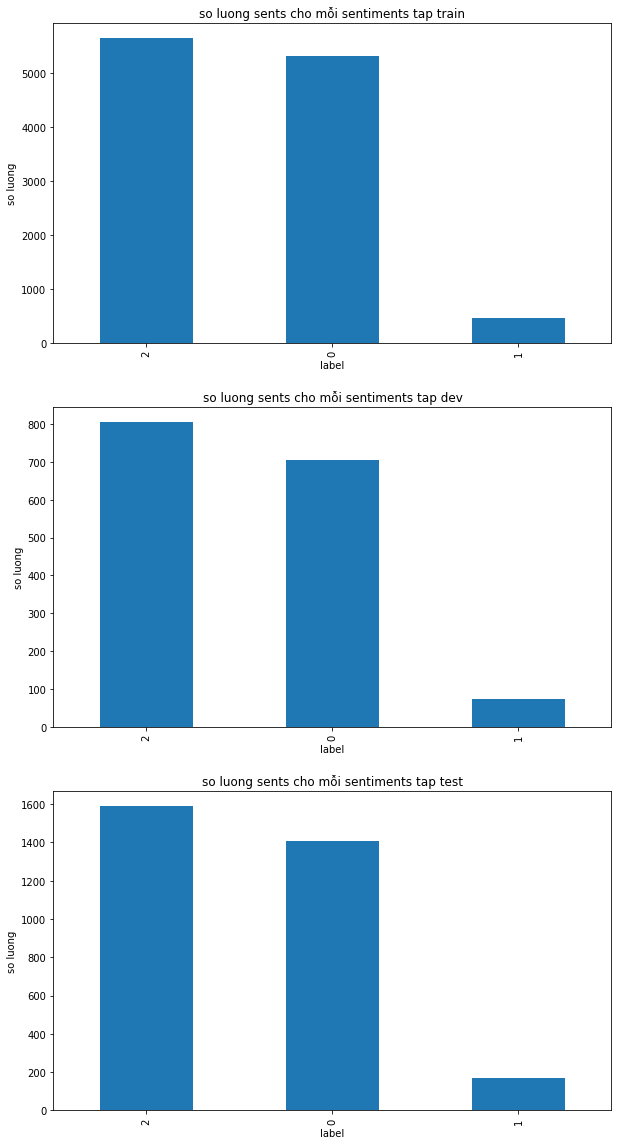

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(311)
y_train1['s'].value_counts().plot(kind='bar')
plt.title('so luong sents cho mỗi sentiments tap train')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(312)
y_dev1['s'].value_counts().plot(kind='bar')
plt.title('so luong sents cho mỗi sentiments tap dev')
plt.xlabel('label')
plt.ylabel('so luong')

plt.subplot(313)
y_test1['s'].value_counts().plot(kind='bar')
plt.title('so luong sents cho mỗi sentiments tap test')
plt.xlabel('label')
plt.ylabel('so luong')

# Train model bằng Naive Bayes cho label Sentiments

In [ ]:
# MultinomialNB
my_tags1 =['0','1','2']
nb = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
nb.fit(sents_train['s'],senti_train['s'])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# classification_report
y_pred = nb.predict(sents_test['s'])

print('accuracy %s' % accuracy_score(y_pred, senti_test['s']))
print(classification_report(senti_test['s'], y_pred,target_names=my_tags1))

accuracy 0.8401768793430195
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1409
           1       0.00      0.00      0.00       167
           2       0.89      0.85      0.87      1590

    accuracy                           0.84      3166
   macro avg       0.56      0.59      0.58      3166
weighted avg       0.80      0.84      0.82      3166

